In [2]:
import pandas as pd
import numpy as np
from scipy import signal, optimize, special
import matplotlib.pyplot as plt
import math
from uncertainties import ufloat
#from uprava_vystupu import zaokrouhleni

In [5]:
voltamper = pd.read_excel("data_03.xlsx", sheet_name="V-A charakteristika", engine="openpyxl").dropna()
fotonka = pd.read_excel("data_03.xlsx", sheet_name="fotonka", engine="openpyxl").dropna()

,t [\mu s],U_RI [mV],U_F [mV]
0,620,1.44,0.234
1,635,1.42,0.233
2,650,1.38,0.235
3,670,1.34,0.239
4,730,1.22,0.254
5,800,1.10,0.267
6,900,0.94,0.286
7,1000,0.78,0.298
8,1200,0.54,0.308
9,1240,0.48,0.302



3. Graf závislosti okamžitého výkonu laserového impulsu na čase.
4. Graf závislosti výstupního výkonu laseru na proudu trubicí.

1. Hodnoty naměřených veličin: zapalovací napětí, charakteristický čas nárůstu proudu, opakovací
frekvenci laseru, minimální proud výboje, výstupní výkon laseru v kontinuálním režimu.

In [19]:
u_RI_min = 540 # mV
R_I = 100 # Ohm

veliciny=pd.DataFrame.from_dict({
    "zapalovací napětí [kV]":3.7, 
    "charakteristický čas [\\mu s]":8.8,
    "opakovací frekvence [Hz]":19.23,
    "minimální proud výboje [mA]":u_RI_min/R_I,
    "výkon v kontinuálním režimu [mW]":0.4}, orient="index", columns=["Naměřené veličiny"])
veliciny

,Naměřené veličiny
zapalovací napětí [kV],3.70
charakteristický čas [\mu s],8.80
opakovací frekvence [Hz],19.23
minimální proud výboje [mA],5.40
výkon v kontinuálním režimu [mW],0.40


2. Tabulka a parametrický graf V–A charakteristiky doutnavého výboje.

,U_vybojka [kV],I_vybojka [mA]
0,3.54322,3.2
1,3.54320,3.4
2,3.52297,5.5
3,3.50276,7.4
4,3.46254,9.2
5,3.42230,11.2
6,3.38214,12.4
7,3.34196,13.8
8,3.32182,15.0
9,3.28166,16.2


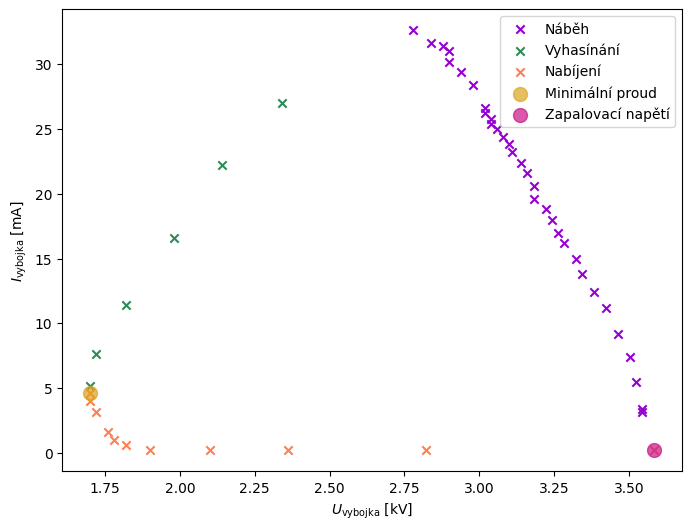

In [77]:
R_I = 100 # Ohm
R_D1 = 100 * 10**6 # Ohm
R_D2 = 100 * 10**3 # Ohm

v_a_charakteristika = pd.DataFrame.from_dict({
    "U_vybojka [kV]": (voltamper["U_mer [V]"]*(1 + R_D1/R_D2) - voltamper["U_RI [V]"])/1000,
    "I_vybojka [mA]": (voltamper["U_RI [V]"]/R_I)*1000})

nabeh = v_a_charakteristika.iloc[:32]

vyhasinani = v_a_charakteristika.iloc[32:38]
min_proud = v_a_charakteristika.iloc[38]
nabijeni = v_a_charakteristika.iloc[38:49]
zapal_napeti = v_a_charakteristika.iloc[48]

voltamperova_charakteristika = plt.figure(figsize=(8,6))
plt.scatter(nabeh["U_vybojka [kV]"], nabeh["I_vybojka [mA]"], 
            marker="x", color="darkviolet",
            label="Náběh")
plt.scatter(vyhasinani["U_vybojka [kV]"], vyhasinani["I_vybojka [mA]"],
            marker="x", color="seagreen",
            label="Vyhasínání")
plt.scatter(nabijeni["U_vybojka [kV]"], nabijeni["I_vybojka [mA]"],
            marker="x", color="coral",
            label="Nabíjení")
plt.scatter(min_proud["U_vybojka [kV]"], min_proud["I_vybojka [mA]"], 
            marker="o", alpha=0.7, color="goldenrod", s=100,
            label="Minimální proud")
plt.scatter(zapal_napeti["U_vybojka [kV]"], zapal_napeti["I_vybojka [mA]"],
            marker="o", alpha=0.7, color="mediumvioletred", s=100,
            label="Zapalovací napětí")
plt.xlabel("$U_\\mathrm{{vybojka}}$ [kV]")
plt.ylabel("$I_\\mathrm{{vybojka}}$ [mA]")
plt.legend()
voltamperova_charakteristika.savefig("./img/voltamperova_charakteristika.pdf")
